# Test Harness - TekMap Object
### Thomas Ales |  June 2020

Description:   
Proof of concept code, and test code for the TekMap object. Used to represent an Y-axis collection of TekData objects. TekData objects represent rows in the scan, and the TekMap object represents the XY collection. 


In [3]:
import time
import MapData

Set `data_directory` to a collection of RF- / DC- .WFM files

In [4]:
data_directory = "C:\\Users\\tka\\source\\repos\\data\\customer042\\Cutset\\120"

Setup the `MapData` object by giving it a `data_directory`.

Metadata:
----------  
acq_angle - SAW Angle in Degrees  
x_start - X-Origin from scanengine2 in mm  
y_start - Y-Origin from scanengine2 in mm  
x_delta - Representation of expected dx/ds, here stagespeed/heliosfrequency  

`assemble_dcmap` organizes the loaded files into the correct order.

In [5]:
_s1 = time.time()
test_MapData = MapData.TekMap(data_directory)
test_MapData.metadata["acq_angle"] = 0
test_MapData.metadata["x_start"] = 43.00
test_MapData.metadata["y_start"] = 40.00
test_MapData.metadata["x_delta"] = 0.005
test_MapData.metadata["y_delta"] = 0.100
test_MapData.metadata["sample_desc"] = "Test Sample"
_e = time.time()
print("Execution time: {0:.5f}s".format(_e - _s1))

Loading 11 & 11 DC / RF Files
Execution time: 1.76598s


## DC Offset Test
### Assembly and Plot

Execution time: 0.24100s


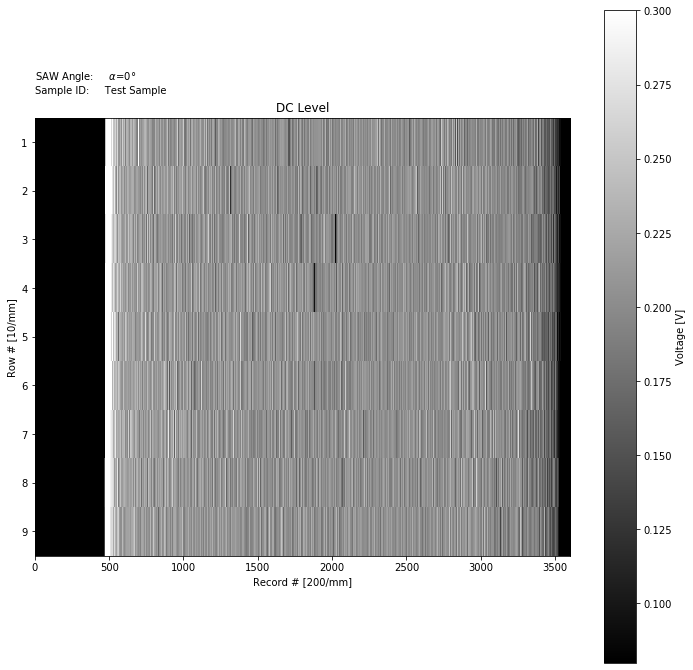

In [6]:
_s = time.time()
test_MapData.assemble_dcmap(True)
#test_MapData.plot_dcmask()
_e = time.time()
print("Execution time: {0:.5f}s".format(_e - _s))

Proof of concept / prototyping code for `TekMap.assemble_dcmap`

`
import numpy as np
dc_map = []
for idx in range(0, test_MapData.waveforms.__len__()):
    dc_map.append([idx, test_MapData.waveforms[idx][1].mean_dc_level])

dc_map.sort
import matplotlib.pyplot as plt

img_map = []
for line in dc_map:
    img_map.append(line[1])
plt.figure(figsize=[10, 10])
plt.imshow(img_map, aspect=3601/180)
plt.clim(0.080, 0.300)
plt.colorbar()
`

## FFT test
### Assembly and Plot

Execution time: 27.68900s


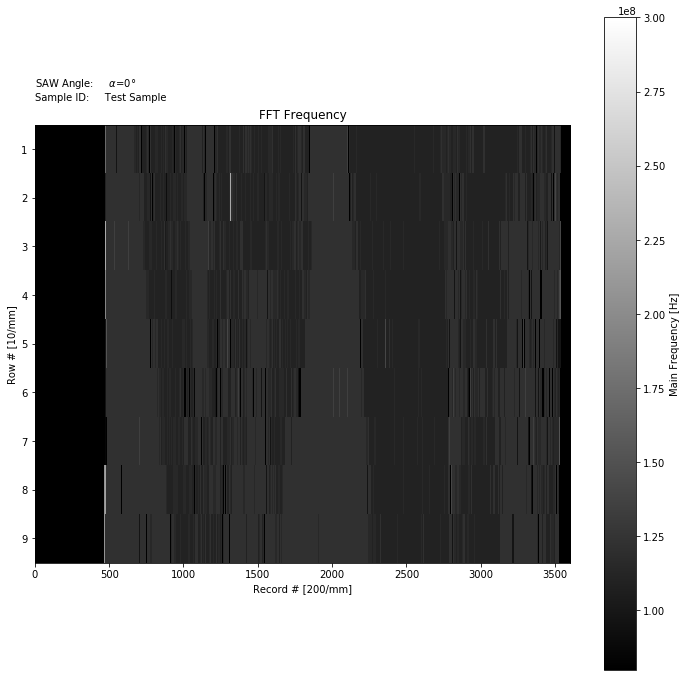

In [7]:
_s = time.time()
test_MapData.assemble_fftmap()
test_MapData.plot_fftmap()
_e = time.time()
print("Execution time: {0:.5f}s".format(_e - _s))

## Velocity Map
### Assembly and Test

Execution time: 0.36000s


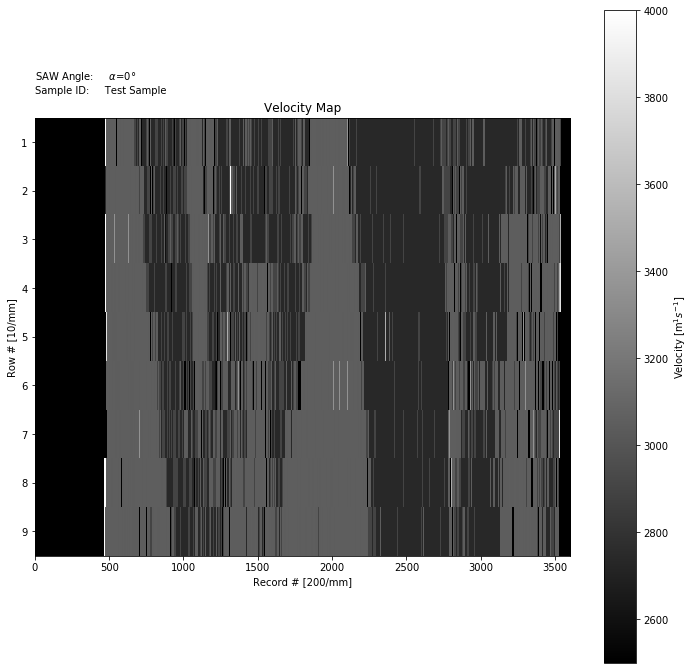

In [8]:
_s = time.time()
test_MapData.assemble_velocitymap() # Default spacing is 25 microns
test_MapData.plot_velocitymap()
_e = time.time()
print("Execution time: {0:.5f}s".format(_e - _s))

In [9]:
_tempmap = []
_spacing = 25.0
velocity_map = []
for fileidx in range(0, test_MapData.waveforms.__len__()):
    _tempmap.append([fileidx, test_MapData.waveforms[fileidx][1].compute_velocity(_spacing)])
_tempmap.sort

for line in _tempmap:
    velocity_map.append(line[1])



Prototype code for `TekMap.assemble_rf_voltagemap()`

In [10]:
'''
import tekwfm
_vt, _ts, _tsc, _tf, _tdf, _td = tekwfm.read_wfm(test_MapData.waveforms[100][1].rf_filename)
_vtdf = pd.DataFrame(_vt)
_record = []
for record_index in range(0, test_MapData.waveforms[100][1].frames_in_file):
    _maxvoltidx = _vtdf[record_index].argmax()
    _record.append(_vtdf.loc[_maxvoltidx, record_index])
_recdf = pd.DataFrame(_record)
plt.plot(_recdf)
'''

'\nimport tekwfm\n_vt, _ts, _tsc, _tf, _tdf, _td = tekwfm.read_wfm(test_MapData.waveforms[100][1].rf_filename)\n_vtdf = pd.DataFrame(_vt)\n_record = []\nfor record_index in range(0, test_MapData.waveforms[100][1].frames_in_file):\n    _maxvoltidx = _vtdf[record_index].argmax()\n    _record.append(_vtdf.loc[_maxvoltidx, record_index])\n_recdf = pd.DataFrame(_record)\nplt.plot(_recdf)\n'

Execution time: 9.46525s
Total test execution time: 42.26523s


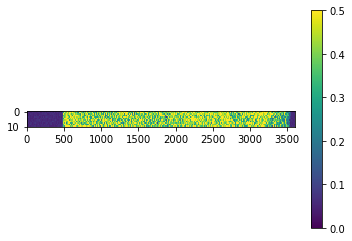

In [11]:
import matplotlib.pyplot as plt
_s = time.time()
test_MapData.assemble_rf_voltagemap()
plt.imshow(test_MapData.rf_voltagemap, aspect=3601/180)
plt.colorbar()
plt.clim(0.0, 0.5)
_e1 = time.time()
print("Execution time: {0:.5f}s".format(_e1 - _s))
print("Total test execution time: {0:.5f}s".format(_e1 - _s1))

In [12]:
from multiprocessing import Pool

In [13]:
def get_rf_files(row, waveforms):
    return waveforms[row][1].rf_filename

In [14]:
get_rf_files(1, test_MapData.waveforms)

'C:\\Users\\tka\\source\\repos\\data\\customer042\\Cutset\\120/RF-00021.wfm'

In [15]:
mp = Pool()

In [16]:
from multiprocessing import Pool
import functools 

def mp_loadfiles():
    mp = Pool(processes=4)
    output = mp.map(functools.partial(get_rf_files, waveforms=test_MapData.waveforms), range(0, 10))
    mp.start()
    mp.join()
    for current in output:
        print(current)



In [17]:
if __name__ == '__main__':
    print("Main")
    mp_loadfiles()

Main
